In [1]:
import numpy as np
import scipy.signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import pandas as pd

def lowpass(data: np.ndarray, cutoff: float, sample_rate: float, poles: int = 5):
    sos = scipy.signal.butter(poles, cutoff, 'lowpass', fs=sample_rate, output='sos')
    filtered_data = scipy.signal.sosfiltfilt(sos, data)
    return filtered_data

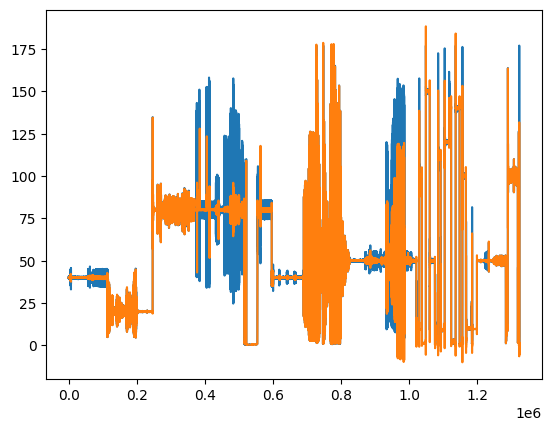

In [2]:
data = pd.read_csv("./data.csv",sep=",")
tension_real = data["Tension_0"].to_numpy()

filtered  = lowpass(tension_real,8,800)

plt.plot(tension_real)
plt.plot(filtered)

In [3]:
df = pd.DataFrame()
tension_0 = []
tension_1 = []
tension_2 = []
tension_0.append(filtered[0])
tension_1.append(data["Tension_1"][0])
tension_2.append(data["Tension_2"][0])

tension_0.append(filtered[1])
tension_1.append(filtered[0])
tension_2.append(data["Tension_1"][0])

for i in range(2,len(filtered)):
    tension_0.append(filtered[i])
    tension_1.append(filtered[i-1])
    tension_2.append(filtered[i-2])
df["ControllerOutput"] = data["ControllerOutput"]
df["Tension_1"] = tension_1
df["Tension_0"] = tension_0
df["Tension_2"] = tension_2
df.to_csv("./filteredData.csv",encoding='utf-8', index=False)
